In [1]:
# from simulation_toykit_kspace import *
import numpy as np
import sys
sys.path.append('/home/like/repos/simulation/build')
from simulation import *
import simulation as sim
from math import *


[0] → submodule test_fresnel will be loaded
[0] ← submodule test_fresnel will be loaded (time: 0ms)
[0] → submodule test_grid_info will be loaded
[0] ← submodule test_grid_info will be loaded (time: 0ms)
[0] → submodule test_source will be loaded
[0] ← submodule test_source will be loaded (time: 0ms)
[0] → submodule test_zernike will be loaded
[0] ← submodule test_zernike will be loaded (time: 0ms)
[0] → submodule basic_structure will be loaded
[0] ← submodule basic_structure will be loaded (time: 0ms)
[0] → submodule fresnel will be loaded
[0] ← submodule fresnel will be loaded (time: 0ms)
[0] → submodule geometry will be loaded
[0] ← submodule geometry will be loaded (time: 0ms)
[0] → submodule simulation_grid_info will be loaded
[0] ← submodule simulation_grid_info will be loaded (time: 0ms)
[0] → submodule source_grid will be loaded
[0] ← submodule source_grid will be loaded (time: 0ms)
[0] → submodule thin_mask will be loaded
[0] ← submodule thin_mask will be loaded (time: 0ms)
[0

In [2]:
wavelength = 13.0
NA = 0.9
# sigma = NA
# M = (NA + sigma)/NA
sigma = 0
M = 1
pitch = 16
grid_info_2d = grid_info_2d_s.create_grid_info_bloch_mode([16, 16], wavelength, sigma, NA, [[-pitch/2, -pitch/2], [pitch/2, pitch/2]], 1e-6)
print(grid_info_2d)


* grid info                           
----------------------------------------
tilesize      :  [16,16]              
spatial start :  [-8,-8]              
spatial step  :  [1,1]                
fourier start :  [0,0]                
fourier step  :  [0.902778,0.902778]  
coords place  :  |*--|corner          




* unpolarized traditional source in Wafer P.O.V (sigmaXY)


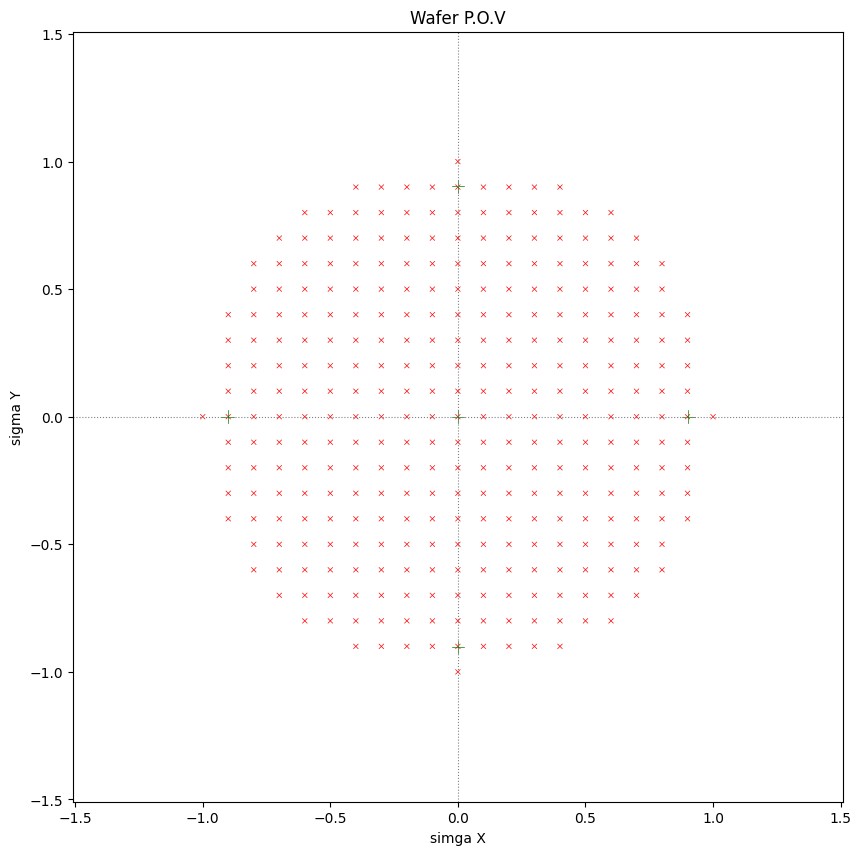


* Discrete source in Wafer P.O.V (sigmaXY)
    polarization is SP


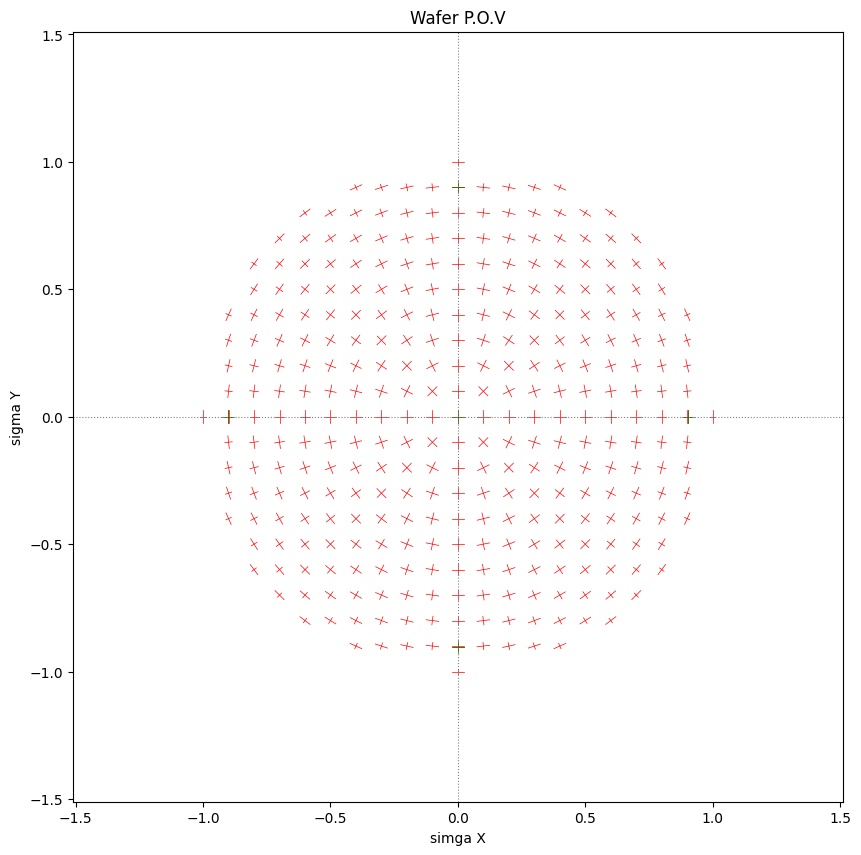

[[0.902778,0],[0.902778,0],[-0.6,0.1],[-0.6,0.1],[-0.902778,0],[-0.902778,0],[0.8,0.1],[0.8,0.1],[0,0.9],[0,0.9],[-0.4,0.9],[-0.4,0.9],[0,-0.5],[0,-0.5],[0,0],[0,0],[0,0.5],[0,0.5],[-0.7,-0.7],[-0.7,-0.7],[-0.7,0.3],[-0.7,0.3],[-0.7,0.2],[-0.7,0.2],[-0.4,0],[-0.4,0],[-0.4,0.5],[-0.4,0.5],[0,-0.9],[0,-0.9],[-0.4,-0.5],[-0.4,-0.5],[-0.7,-0.4],[-0.7,-0.4],[0.6,0.1],[0.6,0.1],[-0.7,-0.6],[-0.7,-0.6],[-0.2,-0.1],[-0.2,-0.1],[-0.4,-0.9],[-0.4,-0.9],[-0.3,0.8],[-0.3,0.8],[-0.3,-0.7],[-0.3,-0.7],[-0.3,0.3],[-0.3,0.3],[-0.3,0.2],[-0.3,0.2],[-0.3,-0.4],[-0.3,-0.4],[-0.3,-0.6],[-0.3,-0.6],[-0.1,0.8],[-0.1,0.8],[-0.1,-0.7],[-0.1,-0.7],[-0.1,0.3],[-0.1,0.3],[-0.1,0.2],[-0.1,0.2],[-0.1,-0.4],[-0.1,-0.4],[-0.5,-0.7],[-0.5,-0.7],[-0.5,0.3],[-0.5,0.3],[-0.5,0.8],[-0.5,0.8],[-0.1,-0.6],[-0.1,-0.6],[-0.5,0.2],[-0.5,0.2],[-0.5,-0.4],[-0.5,-0.4],[-0.5,-0.6],[-0.5,-0.6],[0.2,0.9],[0.2,0.9],[0.9,0.3],[0.9,0.3],[0.9,0.2],[0.9,0.2],[0.9,-0.4],[0.9,-0.4],[0.2,-0.5],[0.2,-0.5],[0.2,0],[0.2,0],[0.2,0.5],[0.2,0.5]

In [ ]:
def unique_sigmaxy(sigmaxy):
    return list(map(list, set(map(tuple, sigmaxy))))
def get_min_max(xy):
    x = [x for x, y in xy]
    y = [x for x, y in xy]
    ilx, ily = x.index(min(x)), y.index(min(y))
    iux, iuy = x.index(max(x)), y.index(max(y))
    return (xy[iux], xy[iuy], xy[ilx], xy[ily])


shift_pixel = 0
source_sampling_size = 21
assert(source_sampling_size%2 == 1)

ts = traditional_source_s()
ts.sigma = 1
ts.center_x = shift_pixel/ source_sampling_size
ts.center_y = shift_pixel/ source_sampling_size

# 
print("\n* unpolarized traditional source in Wafer P.O.V (sigmaXY)")
xy = source_grid_s.create_traditional_source(source_sampling_size, ts, 0.25*np.pi)
sigmaxy = xy.plot_wafer_pov(grid_info_2d)
unique_sigma = unique_sigmaxy(sigmaxy)

print("\n* Discrete source in Wafer P.O.V (sigmaXY)")
sp = source_grid_s(unique_sigma, xy.shape, xy.step)
print(f"    polarization is {sp.basis}")

def create_sp(n):
    x, y = n.sigmaxy
    f = asin(min(1, hypot(x, y) * NA))
    p = source_point_s()
    p.intensity = n.intensity * cos(incidence_angle)
    p.e_field_direction = n.e_field_direction - 0.5*pi
    p.DOP = 1
    p.sigmaxy = n.sigmaxy

    s = n
    s.DOP = 1
    return s,p
sp_list = list()
for n in sp.source_points:
    S, P = create_sp(n)
    sp_list.append(S)
    sp_list.append(P)
sp.source_points = sp_list
sp.plot_wafer_pov(grid_info_2d)

